In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=False)
import os
os.chdir("/content/drive/MyDrive/Python")

Mounted at /content/drive/


In [ ]:
import mba263
import pandas

In [ ]:
data = pandas.read_csv('tuscan_rfm.csv')

In [ ]:
data

,numords,totdol,last,buyer,dollars,rfm1,rfm2
0,7,493,207,no,0,222,211
1,4,423,625,no,0,421,422
2,4,246,28,no,0,134,122
3,3,271,778,no,0,523,532
4,2,148,396,no,0,343,343
...,...,...,...,...,...,...,...
96546,8,440,30,no,0,124,112
96547,2,228,375,yes,40,342,343
96548,1,280,932,yes,200,551,552
96549,1,74,639,no,0,453,455


In [ ]:
data['buy_dummy']=pandas.get_dummies(data['buyer'])['yes']

In [ ]:
mba263.tabulate(data['buy_dummy'])

,Name,Count,Frequency
0,0,94180,0.975443
1,1,2371,0.024557


In [ ]:
data[ ['totdol' , 'buy_dummy'] ].groupby('buy_dummy').mean()

,totdol
buy_dummy,
0,331.991155
1,518.108393


In [ ]:
data['rec_dec'] = mba263.ntile(data['last'],10)
#subtract to reverse the order for frequency.
data['freq_dec'] = 9 - mba263.ntile(data['numords'],10)
#subtract to reverse the order for mv.
data['mv_dec'] = 9 - mba263.ntile(data['totdol'],10)

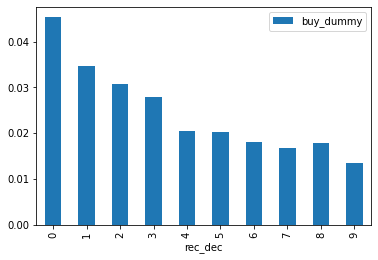

In [ ]:
data[ ['buy_dummy','rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar')

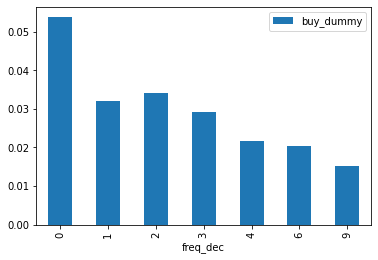

In [ ]:
data[ ['buy_dummy','freq_dec'] ].groupby('freq_dec').mean().plot(kind='bar')

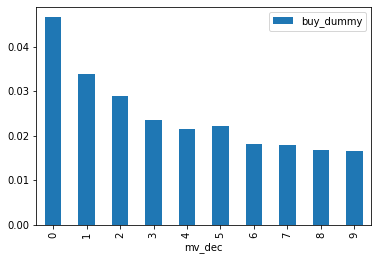

In [ ]:
data[ ['buy_dummy','mv_dec'] ].groupby('mv_dec').mean().plot(kind='bar')

In [ ]:
responded = data[data['buyer'] == 'yes']

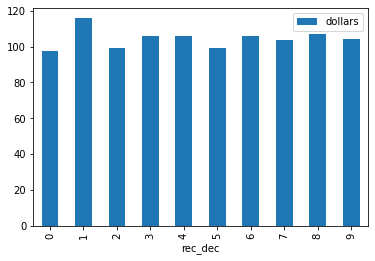

In [ ]:
responded[['dollars', 'rec_dec']].groupby('rec_dec').mean().plot(kind='bar')

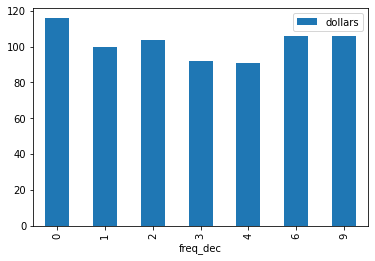

In [ ]:
responded[['dollars', 'freq_dec']].groupby('freq_dec').mean().plot(kind='bar')

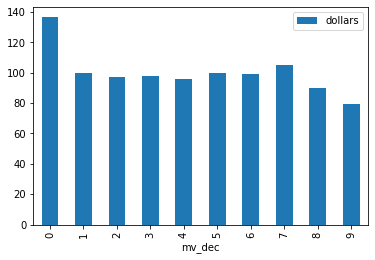

In [ ]:
responded[['dollars', 'mv_dec']].groupby('mv_dec').mean().plot(kind='bar')

In [ ]:
responded[ ['dollars', 'buy_dummy'] ].groupby('buy_dummy').mean()

,dollars
buy_dummy,
1,104.242935


In [ ]:
data['responserate_sq'] = mba263.get_means(data['buy_dummy'], data['rfm1'])

In [ ]:
data['mailto_rfm'] = (data['responserate_sq'] > 0.0192) * 1

In [ ]:
rfm1_mailed = data[data['mailto_rfm'] == 1]

In [ ]:
mba263.tabulate(rfm1_mailed['buy_dummy'])

,Name,Count,Frequency
0,0,50532,0.966398
1,1,1757,0.033602
